# Ex01

#### Objective: Keep only the "purchase" data of "event_type" column and create 3 charts 

First, we have to import the necessary libraries

In [7]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Now we have to lconnect with the database in order to load the data

In [3]:
DB_NAME = "piscineds"
USER = "ojimenez"
PASSWORD = "mysecretpassword"
HOST = "localhost"
PORT = "5432"

# Let's connect with a SQLAlchemy engine (With psycopg2 we have a Warning):
engine_url = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"
engine = create_engine(engine_url)

try:
    with engine.connect() as connection:
        print("Connected to the database successfully!")
except Exception as e:
    print(f"Error connecting to the database: {e}")


Connected to the database successfully!


Now, we are going upload in a pandas dataframe (df) a new table only with the rows where __event_type__ column is __purchase__.
We can't charge all the dataframe in a pandas df because is too much. So first we have to select only the necessary.

In order to have the Data ordered by month, we'll use: DATE_TRUNC()

__DATE_TRUNC(field, source [,time_zone])__

For the first plot we need:
- x axis: Time
- y axis: Number of customers per day

In [4]:
query = """
    SELECT DATE_TRUNC('day', event_time) AS day,
        COUNT(DISTINCT user_id) AS number_of_customers
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY DATE_TRUNC('day', event_time)
    ORDER BY day;
"""

try:
    data = pd.read_sql(query, engine)
    data_cleaned = data.dropna()
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


Now, let's display the first graphic.


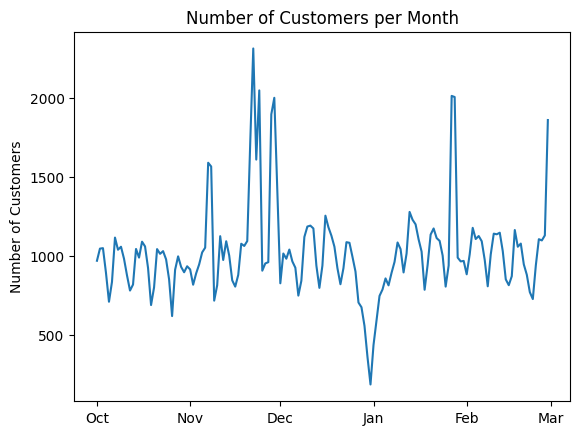

In [13]:
# Convert 'month' column to datetime for easier plotting
data['day'] = pd.to_datetime(data['day'])

# Chart 1: Num of Customers / Months
plt.plot(data['day'], data['number_of_customers'], label="Trend")
plt.title("Number of Customers per Month")
#plt.xlabel("Month")
plt.ylabel("Number of Customers")

# Format the x-axis to display month names (%b only Oct, Nov, ...)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

#plt.xticks(rotation=0)


Now, let's do the next query to plot the next graphic:

In [14]:
query = """
    SELECT DATE_TRUNC('month', event_time) AS month,
        SUM(price) / 1000000 AS total_sales_millions
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY DATE_TRUNC('month', event_time)
    ORDER BY month;
"""

try:
    data = pd.read_sql(query, engine)
    data_cleaned = data.dropna()
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


Now let's plot the data:

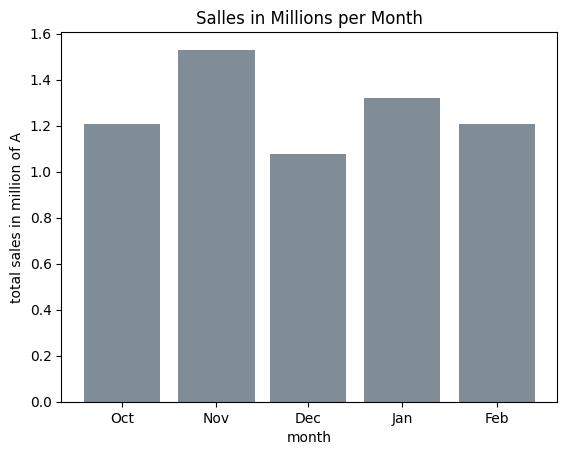

In [34]:
# Convert 'month' column to datetime for easier plotting
data['month'] = pd.to_datetime(data['month'])

# Color
featured_color = (128 / 255, 140 / 255, 150 / 255)

# Chart 1: Num of Customers / Months
plt.bar(
    data['month'], data['total_sales_millions'], 
    label="Total Sales",
    width=25,
    color=featured_color
)
plt.title("Sales in Millions per Month")
plt.xlabel("month")
plt.ylabel("total sales in million of A")

# Format the x-axis to display month names (%b only Oct, Nov, ...)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

#plt.xticks(rotation=0)

Now, let's go for the last one:

We need:
- x axis: Time
- y axis: average spend/customers in Altarians

In [35]:
query = """
    SELECT DATE_TRUNC('day', event_time) AS day,
        SUM(price) AS total_spend_day,
        COUNT(DISTINCT user_id) AS number_of_customers
    FROM customers
    WHERE event_type = 'purchase'
    GROUP BY DATE_TRUNC('day', event_time)
    ORDER BY day;
"""

try:
    data = pd.read_sql(query, engine)
    data_cleaned = data.dropna()
    print("Query executed successfully :)")
except Exception as e:
    print(f"Error: {e}")
finally:
    engine.dispose()

Query executed successfully :)


Now let's plot the data:

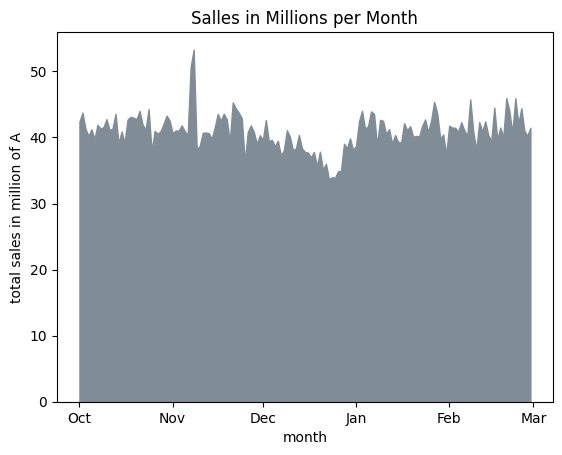

In [48]:
# Convert 'month' column to datetime for easier plotting
data['day'] = pd.to_datetime(data['day'])

# Color
featured_color = (128 / 255, 140 / 255, 150 / 255)

# Chart 1: Num of Customers / Months
plt.stackplot(
    data['day'], data['total_spend_day']/data['number_of_customers'], 
#    width=1,
    color=featured_color
)
plt.title("Salles in Millions per Month")
plt.xlabel("month")
plt.ylabel("total sales in million of A")

# Format the x-axis to display month names (%b only Oct, Nov, ...)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 

#plt.xticks(rotation=0)